<h1 align="center">Backpropagation example</h1>
<h2 align="center">Deep learning in python class with sigmoid activation</h2>
<h3 align="center">Rositsa Chankova</h3>

In [1]:
from __future__ import print_function, division
from builtins import range

# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [2]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [3]:
# determine the classification rate - num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [4]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] # H is (N, M)

    # # slow
    # ret1 = np.zeros((M, K))
    # for n in xrange(N):
    #     for m in xrange(M):
    #         for k in xrange(K):
    #             ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]

    # # a bit faster - let's not loop over m
    # ret2 = np.zeros((M, K))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         ret2[:,k] += (T[n,k]* - Y[n,k])*Z[n,:]

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    # # even faster  - let's not loop over k either
    # ret3 = np.zeros((M, K))
    # for n in xrange(N): # slow way first
    #     ret3 += np.outer( Z[n], T[n] - Y[n] )

    # assert(np.abs(ret1 - ret3).sum() < 0.00001)

    # fastest - let's not loop over anything
    ret4 = Z.T.dot(T - Y)
    # assert(np.abs(ret1 - ret4).sum() < 0.00001)

    return ret4

In [5]:
def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape

    # slow way first
    # ret1 = np.zeros((X.shape[1], M))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         for m in xrange(M):
    #             for d in xrange(D):
    #                 ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1 - Z[n,m])*X[n,d]

    # fastest
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    return ret2

In [6]:
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)

In [7]:
def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

In [8]:
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

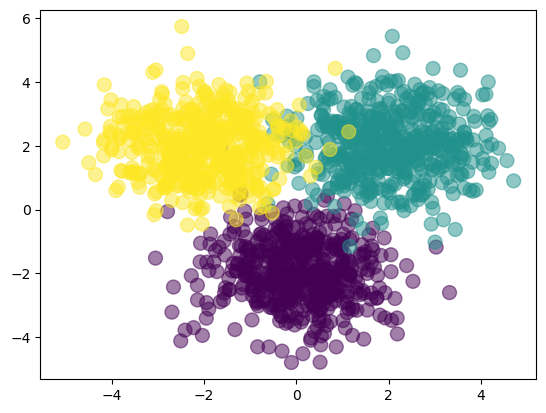

cost: -3147.180844402328 classification_rate: 0.26866666666666666
cost: -142.75880400595366 classification_rate: 0.968
cost: -123.08848497133181 classification_rate: 0.9693333333333334
cost: -118.58384015184424 classification_rate: 0.9693333333333334
cost: -116.67606916900948 classification_rate: 0.9686666666666667
cost: -115.5938369554607 classification_rate: 0.9693333333333334
cost: -114.86569239628446 classification_rate: 0.97
cost: -114.32077560471544 classification_rate: 0.97
cost: -113.88426454456248 classification_rate: 0.97
cost: -113.51891401775141 classification_rate: 0.97


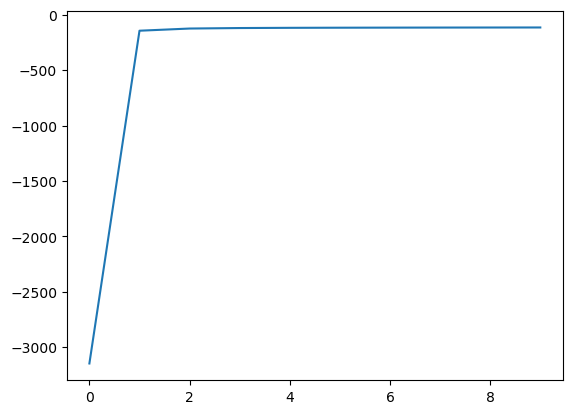

In [9]:
def main():
    # create the data
    Nclass = 500
    D = 2 # dimensionality of input
    M = 3 # hidden layer size
    K = 3 # number of classes

    X1 = np.random.randn(Nclass, D) + np.array([0, -2])
    X2 = np.random.randn(Nclass, D) + np.array([2, 2])
    X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
    X = np.vstack([X1, X2, X3])

    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
    N = len(Y)
    # turn Y into an indicator matrix for training
    T = np.zeros((N, K))
    for i in range(N):
        T[i, Y[i]] = 1

    # let's see what it looks like
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()

    # randomly initialize weights
    W1 = np.random.randn(D, M)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M, K)
    b2 = np.random.randn(K)

    learning_rate = 1e-3
    costs = []
    for epoch in range(1000):
        output, hidden = forward(X, W1, b1, W2, b2)
        if epoch % 100 == 0:
            c = cost(T, output)
            P = np.argmax(output, axis=1)
            r = classification_rate(Y, P)
            print("cost:", c, "classification_rate:", r)
            costs.append(c)

        # this is gradient ASCENT, not DESCENT
        # be comfortable with both!
        # oldW2 = W2.copy()

        gW2 = derivative_w2(hidden, T, output)
        gb2 = derivative_b2(T, output)
        gW1 = derivative_w1(X, hidden, T, output, W2)
        gb1 = derivative_b1(T, output, W2, hidden)

        W2 += learning_rate * gW2
        b2 += learning_rate * gb2
        W1 += learning_rate * gW1
        b1 += learning_rate * gb1

    plt.plot(costs)
    plt.show()


if __name__ == '__main__':
    main()

